## Import Modules

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


## Load the Dataset

In [2]:
# Unzip and extract the content

import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/NNFL Project/Datasets/TESS_Speech_Dataset.zip")
zip_ref.extractall()
zip_ref.close()

In [3]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/TESS Toronto emotional speech set data'):
    counter = 0
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
        counter = counter + 1
        if(counter == 80):
            break
print('Dataset is Loaded')

Dataset is Loaded


In [ ]:
n = 500
paths[n], labels[n]

('/content/drive/MyDrive/NNFL Project/Datasets/archive (1)/TESS Toronto emotional speech set data/YAF_disgust/YAF_deep_disgust.wav',
 'disgust')

In [ ]:
len(paths)

1120

In [ ]:
type(paths)

list

In [ ]:
paths[:5]

['/content/drive/MyDrive/NNFL Project/Datasets/archive (1)/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav',
 '/content/drive/MyDrive/NNFL Project/Datasets/archive (1)/TESS Toronto emotional speech set data/YAF_fear/YAF_fit_fear.wav',
 '/content/drive/MyDrive/NNFL Project/Datasets/archive (1)/TESS Toronto emotional speech set data/YAF_fear/YAF_seize_fear.wav',
 '/content/drive/MyDrive/NNFL Project/Datasets/archive (1)/TESS Toronto emotional speech set data/YAF_fear/YAF_raid_fear.wav',
 '/content/drive/MyDrive/NNFL Project/Datasets/archive (1)/TESS Toronto emotional speech set data/YAF_fear/YAF_perch_fear.wav']

In [ ]:
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

In [ ]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

df['label'][0], df['label'][80], df['label'][162], df['label'][239], df['label'][320], df['label'][400]
df


,speech,label
0,/content/drive/MyDrive/NNFL Project/Datasets/a...,fear
1,/content/drive/MyDrive/NNFL Project/Datasets/a...,fear
2,/content/drive/MyDrive/NNFL Project/Datasets/a...,fear
3,/content/drive/MyDrive/NNFL Project/Datasets/a...,fear
4,/content/drive/MyDrive/NNFL Project/Datasets/a...,fear
...,...,...
1115,/content/drive/MyDrive/NNFL Project/Datasets/a...,angry
1116,/content/drive/MyDrive/NNFL Project/Datasets/a...,angry
1117,/content/drive/MyDrive/NNFL Project/Datasets/a...,angry
1118,/content/drive/MyDrive/NNFL Project/Datasets/a...,angry


In [ ]:
np.array(df['speech'][df['label']=='angry'])[0]

'/content/drive/MyDrive/NNFL Project/Datasets/archive (1)/TESS Toronto emotional speech set data/YAF_angry/YAF_good_angry.wav'

In [ ]:
df['speech']

0       /content/drive/MyDrive/NNFL Project/Datasets/a...
1       /content/drive/MyDrive/NNFL Project/Datasets/a...
2       /content/drive/MyDrive/NNFL Project/Datasets/a...
3       /content/drive/MyDrive/NNFL Project/Datasets/a...
4       /content/drive/MyDrive/NNFL Project/Datasets/a...
                              ...                        
1115    /content/drive/MyDrive/NNFL Project/Datasets/a...
1116    /content/drive/MyDrive/NNFL Project/Datasets/a...
1117    /content/drive/MyDrive/NNFL Project/Datasets/a...
1118    /content/drive/MyDrive/NNFL Project/Datasets/a...
1119    /content/drive/MyDrive/NNFL Project/Datasets/a...
Name: speech, Length: 1120, dtype: object

In [ ]:
df['speech'][1000]

'/content/drive/MyDrive/NNFL Project/Datasets/archive (1)/TESS Toronto emotional speech set data/OAF_disgust/OAF_doll_disgust.wav'

In [ ]:
df['label'].value_counts()

fear       160
sad        160
neutral    160
happy      160
ps         160
disgust    160
angry      160
Name: label, dtype: int64

## Exploratory Data Analysis

<Axes: xlabel='label', ylabel='count'>

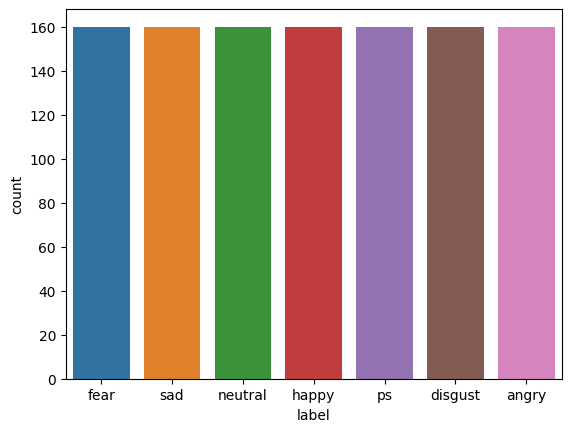

In [ ]:
sns.countplot(data=df, x='label')

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

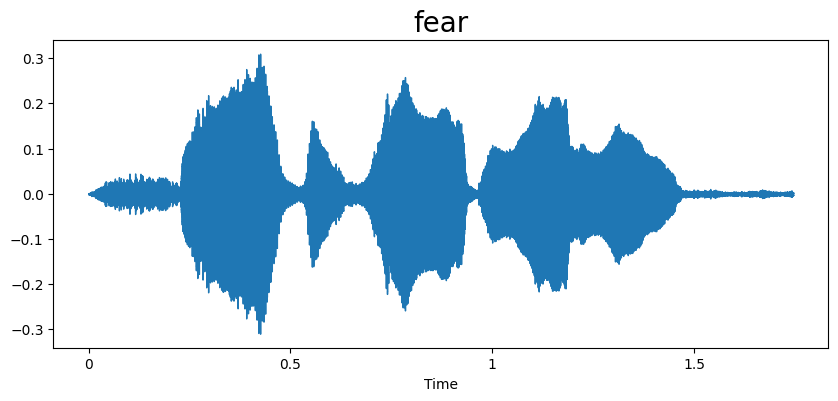

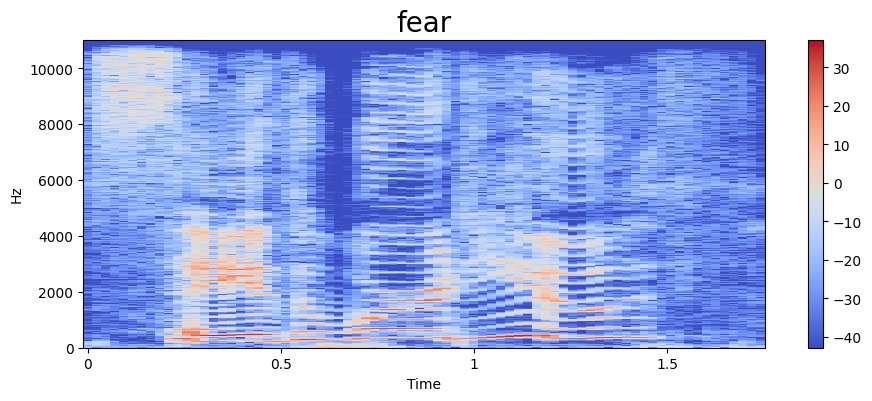

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

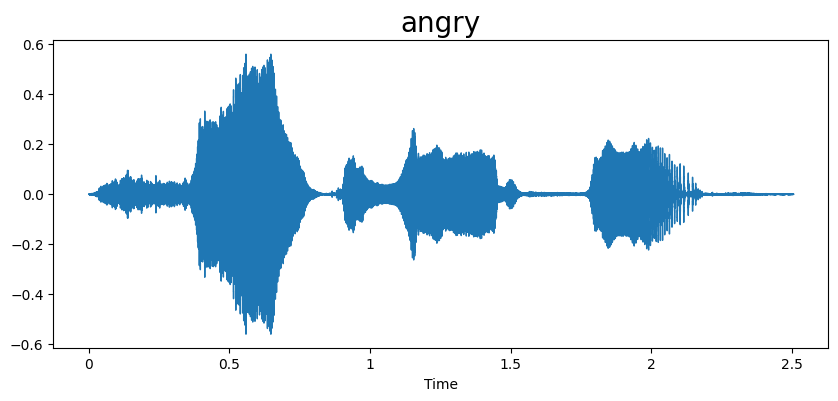

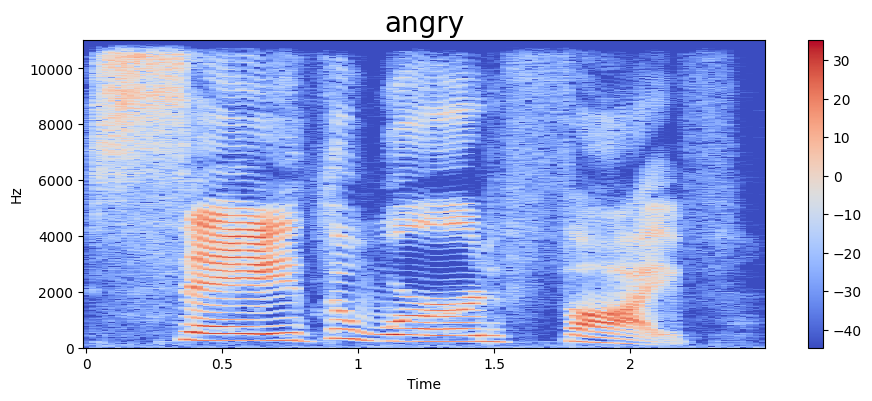

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

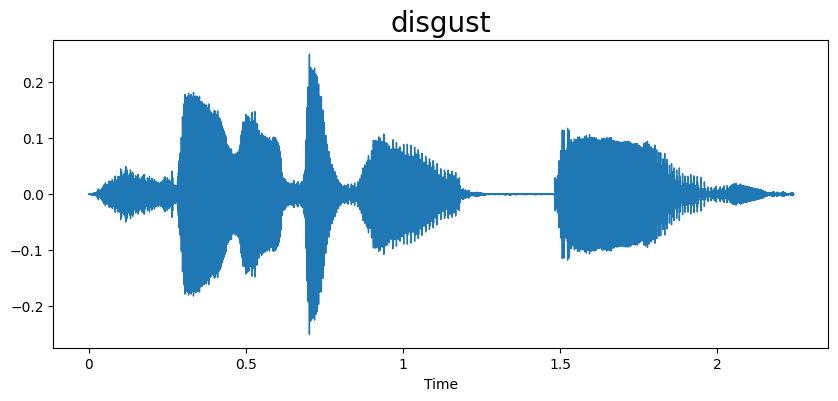

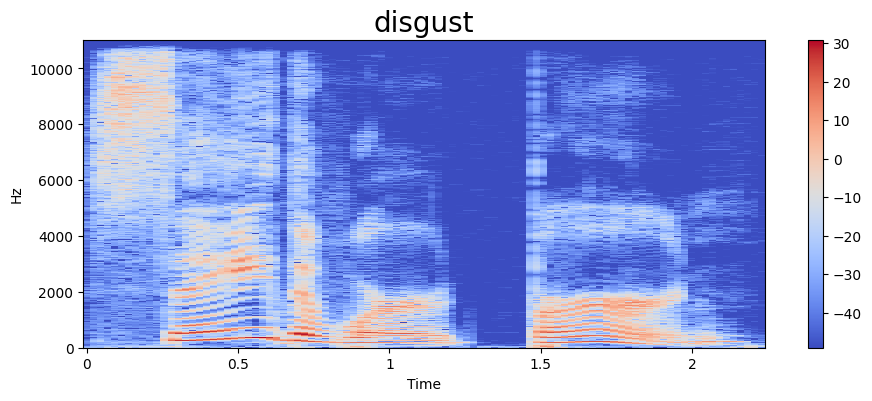

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

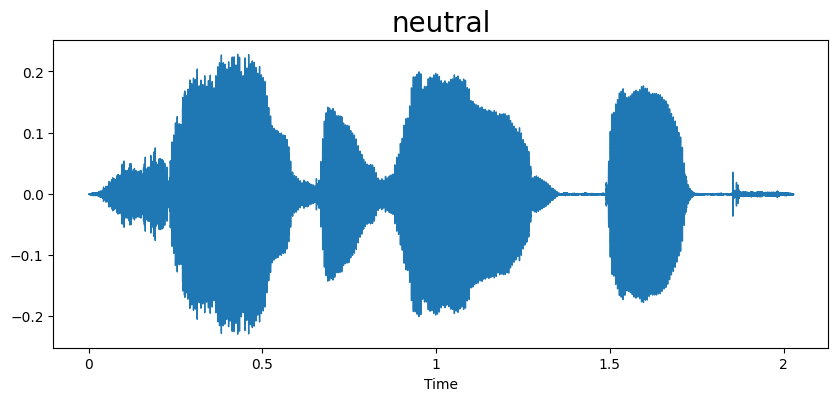

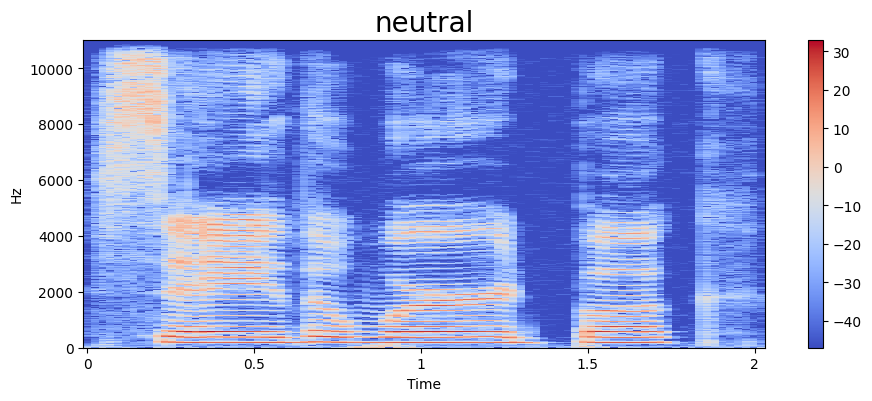

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

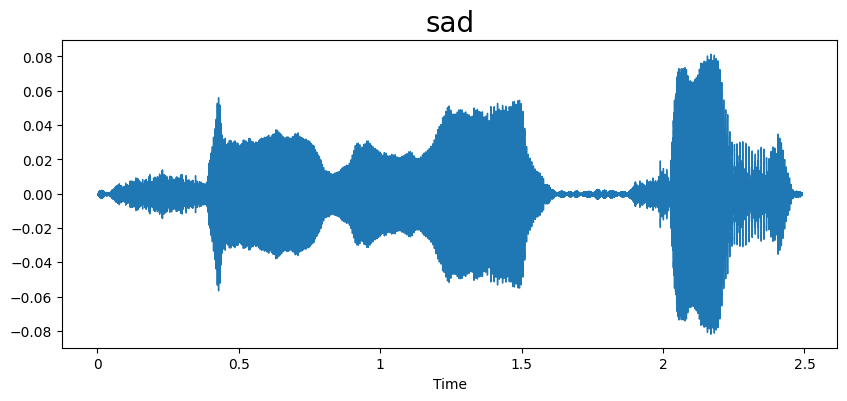

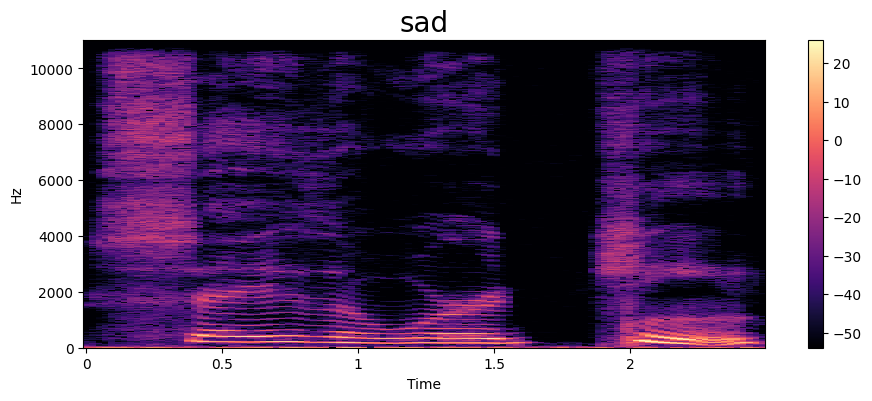

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

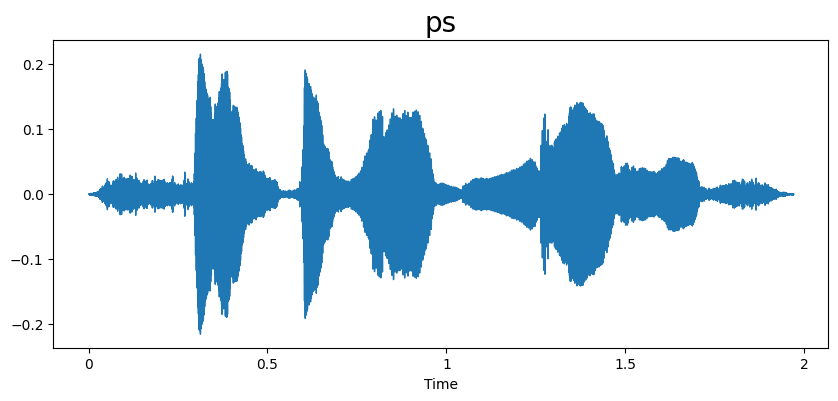

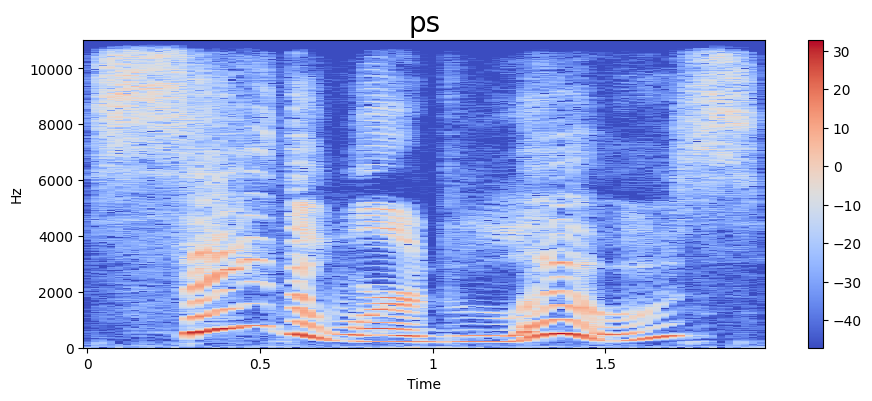

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

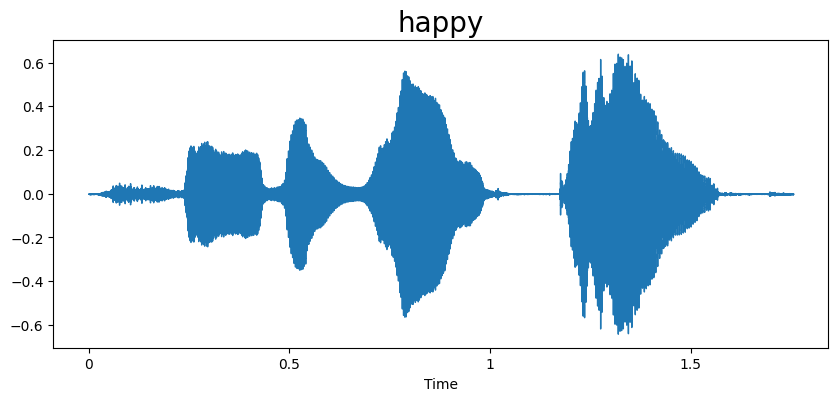

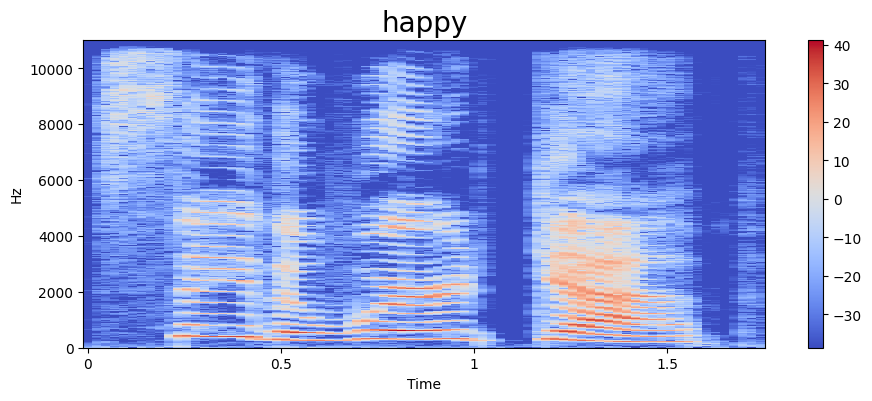

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

## Feature Extraction

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-3.48343323e+02,  3.51932335e+01, -3.84132719e+00,  1.46588755e+01,
        6.42105341e+00, -7.73786604e-01, -4.09144258e+00, -7.51250219e+00,
       -2.01212769e+01,  1.18044972e+00, -1.38880424e+01,  1.45124829e+00,
       -2.75675058e+00,  2.42258739e+00,  4.35812265e-01,  2.73143888e+00,
       -1.60949051e+00,  2.09669914e+01,  6.82517910e+00,  2.08574371e+01,
        2.34099522e+01,  1.87370834e+01,  4.25021315e+00,  4.57039595e+00,
       -6.56271029e+00,  7.48917723e+00,  4.70023841e-01,  2.87454391e+00,
       -1.13248835e+01, -1.00278063e+01, -2.99417281e+00,  7.14576435e+00,
       -1.77482820e+00, -7.04389906e+00, -1.25711565e+01,  3.31683660e+00,
        1.70179546e+00, -6.45631909e-01,  3.35101157e-01,  9.38359833e+00],
      dtype=float32)

In [ ]:
len(df['speech'])

1120

In [ ]:
df

,speech,label
0,/content/drive/MyDrive/NNFL Project/Datasets/a...,fear
1,/content/drive/MyDrive/NNFL Project/Datasets/a...,fear
2,/content/drive/MyDrive/NNFL Project/Datasets/a...,fear
3,/content/drive/MyDrive/NNFL Project/Datasets/a...,fear
4,/content/drive/MyDrive/NNFL Project/Datasets/a...,fear
...,...,...
1115,/content/drive/MyDrive/NNFL Project/Datasets/a...,angry
1116,/content/drive/MyDrive/NNFL Project/Datasets/a...,angry
1117,/content/drive/MyDrive/NNFL Project/Datasets/a...,angry
1118,/content/drive/MyDrive/NNFL Project/Datasets/a...,angry


In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

0       [-348.34332, 35.193233, -3.8413272, 14.658875,...
1       [-349.79498, 24.01079, -7.464212, 14.943555, 0...
2       [-333.96802, 21.607676, -8.897403, 15.912867, ...
3       [-308.4438, 67.62097, -28.922379, 20.947874, 0...
4       [-345.82077, 34.383247, -12.67451, 1.784256, -...
                              ...                        
1115    [-466.05695, 72.68218, 6.873391, 4.845342, 9.1...
1116    [-428.6321, 100.859566, -27.002722, -40.025597...
1117    [-445.3795, 73.91618, -0.0795099, -2.6313987, ...
1118    [-385.75012, 75.62795, -31.950064, -28.6214, -...
1119    [-421.27042, 56.129623, -3.9799917, -6.122265,...
Name: speech, Length: 1120, dtype: object

In [ ]:
import random

# Shuffling the data so that the DL architecture can better learn the patterns in the data
random.shuffle(X_mfcc)

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape
X

array([[-424.77618  ,  117.13991  ,   -9.993388 , ...,    6.2354465,
           4.786909 ,    8.010651 ],
       [-395.71042  ,   81.579506 ,   -6.245987 , ...,    7.9978366,
           2.1374676,    2.860165 ],
       [-306.06625  ,   25.375587 ,  -18.676973 , ...,   -5.667781 ,
          -0.9181702,    3.4577367],
       ...,
       [-439.41272  ,  100.56419  ,   22.096287 , ...,    9.718496 ,
          10.852482 ,   15.4049635],
       [-427.3091   ,  114.52821  ,   20.452835 , ...,   14.702802 ,
          15.207209 ,   16.932318 ],
       [-532.5362   ,   99.09292  ,   36.074722 , ...,   13.804556 ,
          13.866702 ,   13.624457 ]], dtype=float32)

In [ ]:
# input split
X = np.expand_dims(X, -1)
X.shape

(1120, 40, 1)

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder()
# y = enc.fit_transform(df[['label']])

In [ ]:
y = []

for i in range(df['label'].size):
  if df['label'][i] == 'angry':
    y.append([1., 0., 0., 0., 0., 0., 0.])
  elif df['label'][i] == 'disgusted':
    y.append([0., 1., 0., 0., 0., 0., 0.])
  elif df['label'][i] == 'fear':
    y.append([0., 0., 1., 0., 0., 0., 0.])
  elif df['label'][i] == 'happy':
    y.append([0., 0., 0., 1., 0., 0., 0.])
  elif df['label'][i] == 'neutral':
    y.append([0., 0., 0., 0., 1., 0., 0.])
  elif df['label'][i] == 'sad':
    y.append([0., 0., 0., 0., 0., 1., 0.])
  else:
    y.append([0., 0., 0., 0., 0., 0., 1.])

y = np.array(y)

In [ ]:
df['label'][0], df['label'][165], df['label'][340], df['label'][498], df['label'][654], df['label'][820], df['label'][980]

('fear', 'sad', 'happy', 'disgust', 'ps', 'neutral', 'disgust')

In [ ]:
y[0], y[165], y[340], y[498], y[654], y[978], y[1110]

(array([0., 0., 1., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 1., 0.]),
 array([0., 0., 0., 1., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 1.]),
 array([0., 0., 0., 0., 0., 0., 1.]),
 array([0., 0., 0., 0., 0., 0., 1.]),
 array([1., 0., 0., 0., 0., 0., 0.]))

In [ ]:
y.shape

(1120, 7)

## Create the LSTM Model

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 256)               264192    
                                                                 
 dropout_49 (Dropout)        (None, 256)               0         
                                                                 
 dense_49 (Dense)            (None, 128)               32896     
                                                                 
 dropout_50 (Dropout)        (None, 128)               0         
                                                                 
 dense_50 (Dense)            (None, 64)                8256      
                                                                 
 dropout_51 (Dropout)        (None, 64)                0         
                                                                 
 dense_51 (Dense)            (None, 7)               

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=220, batch_size=32)

Epoch 1/220
25/25 [==============================] - 4s 10ms/step - loss: 1.8449 - accuracy: 0.2628
Epoch 2/220
25/25 [==============================] - 0s 9ms/step - loss: 1.8000 - accuracy: 0.2385
Epoch 3/220
25/25 [==============================] - 0s 9ms/step - loss: 1.7820 - accuracy: 0.2883
Epoch 4/220
25/25 [==============================] - 0s 9ms/step - loss: 1.7888 - accuracy: 0.2628
Epoch 5/220
25/25 [==============================] - 0s 8ms/step - loss: 1.7727 - accuracy: 0.2768
Epoch 6/220
25/25 [==============================] - 0s 9ms/step - loss: 1.7742 - accuracy: 0.2679
Epoch 7/220
25/25 [==============================] - 0s 8ms/step - loss: 1.7664 - accuracy: 0.2844
Epoch 8/220
25/25 [==============================] - 0s 8ms/step - loss: 1.7548 - accuracy: 0.2844
Epoch 9/220
25/25 [==============================] - 0s 7ms/step - loss: 1.7642 - accuracy: 0.2844
Epoch 10/220
25/25 [==============================] - 0s 8ms/step - loss: 1.7683 - accuracy: 0.2730
Epoch 11

In [ ]:
# best val accuracy: 72.32
# use checkpoint to save the best val accuracy model
# adjust learning rate for slow convergence

In [ ]:
# model.shape

## Plot the results

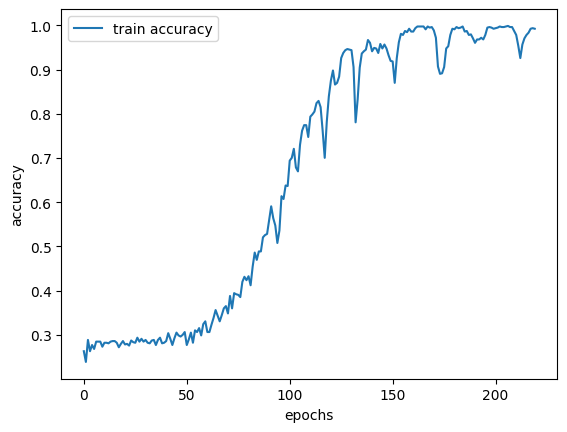

In [ ]:
epochs = list(range(220))
acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
# plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

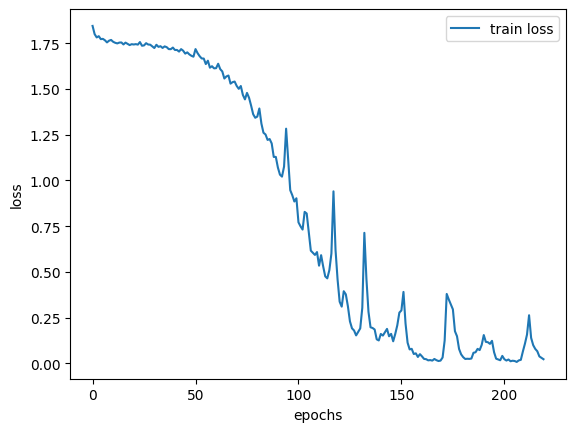

In [ ]:
loss = history.history['loss']
# val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
# plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
model.save("/content/drive/MyDrive/NNFL Project/Models/final_model_speechRecognition.h5")

In [ ]:
test_mfcc = extract_mfcc('/content/TESS Toronto emotional speech set data/OAF_Sad/OAF_base_sad.wav')
A = [a for a in test_mfcc]
A = np.array(A)
A = np.expand_dims(A, -1)
A = np.expand_dims(A, axis=0)

A.shape

(1, 40, 1)

In [ ]:
test_mfcc = extract_mfcc('/content/TESS Toronto emotional speech set data/OAF_happy/OAF_burn_happy.wav')
B = [a for a in test_mfcc]
B = np.array(B)
B = np.expand_dims(B, -1)
B = np.expand_dims(B, axis=0)

B.shape

(1, 40, 1)

In [ ]:
model.predict_step(A)

<tf.Tensor: shape=(1, 7), dtype=float32, numpy=
array([[1.5637994e-05, 7.5003227e-19, 2.1332440e-04, 1.1801228e-03,
        2.1215778e-06, 1.2450110e-05, 9.9857640e-01]], dtype=float32)>

In [ ]:
model.predict_step(B)

<tf.Tensor: shape=(1, 7), dtype=float32, numpy=
array([[1.3040399e-05, 5.3275684e-31, 1.2390355e-10, 1.3433619e-08,
        7.5870958e-08, 1.0994424e-07, 9.9998665e-01]], dtype=float32)>

In [ ]:
# Assuming you have a trained model and a test dataset
test_loss, test_accuracy = model.evaluate(x=X_test, y=y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

11/11 [==============================] - 1s 6ms/step - loss: 7.2939 - accuracy: 0.2054
Test Loss: 7.293881416320801
Test Accuracy: 0.2053571492433548
